# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [65]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from random import shuffle
from sklearn.model_selection import train_test_split
original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [2]:

df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1862 to 1945
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1886 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1887 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1887 non-null   object 
 7   website url          1738 non-null   object 
 8   menu url             723 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1068 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [3]:
print(df_train.info())
df_train.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1862 to 1945
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1886 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1887 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1887 non-null   object 
 7   website url          1738 non-null   object 
 8   menu url             723 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1068 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
1862,#8,Frituur Peter,3.5 of 5 bubbles,11 reviews,$$ - $$$|Belgian|Bar|European,"Diederikstraat 42, Assenede 9960 Belgium",+32 9 344 27 00,NaN,NaN,False,NaN,False,False,4.0,3.5,4.0,-1.0,NaN,NaN,No pricing available,"Bar, Pub, Belgian, European",NaN,NaN,NaN,12152537
84,#1,The Boondocks - American Steakhouse,4.0 of 5 bubbles,215 reviews,$$ - $$$|American|Steakhouse|Grill,"Watermolenweg 102, Wichelen 9260 Belgium",+32 9 366 62 33,http://www.boondocks.be/,http://www.boondocks.be/menu.asp?id=1&lang=,True,NaN,False,False,4.5,4.0,4.0,4.0,NaN,NaN,€15 - €30,"American, Steakhouse, Grill",NaN,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Parkin...",3368355


we will start by turning rank, general rating, number of reviews to numerical values

In [4]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [5]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [6]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

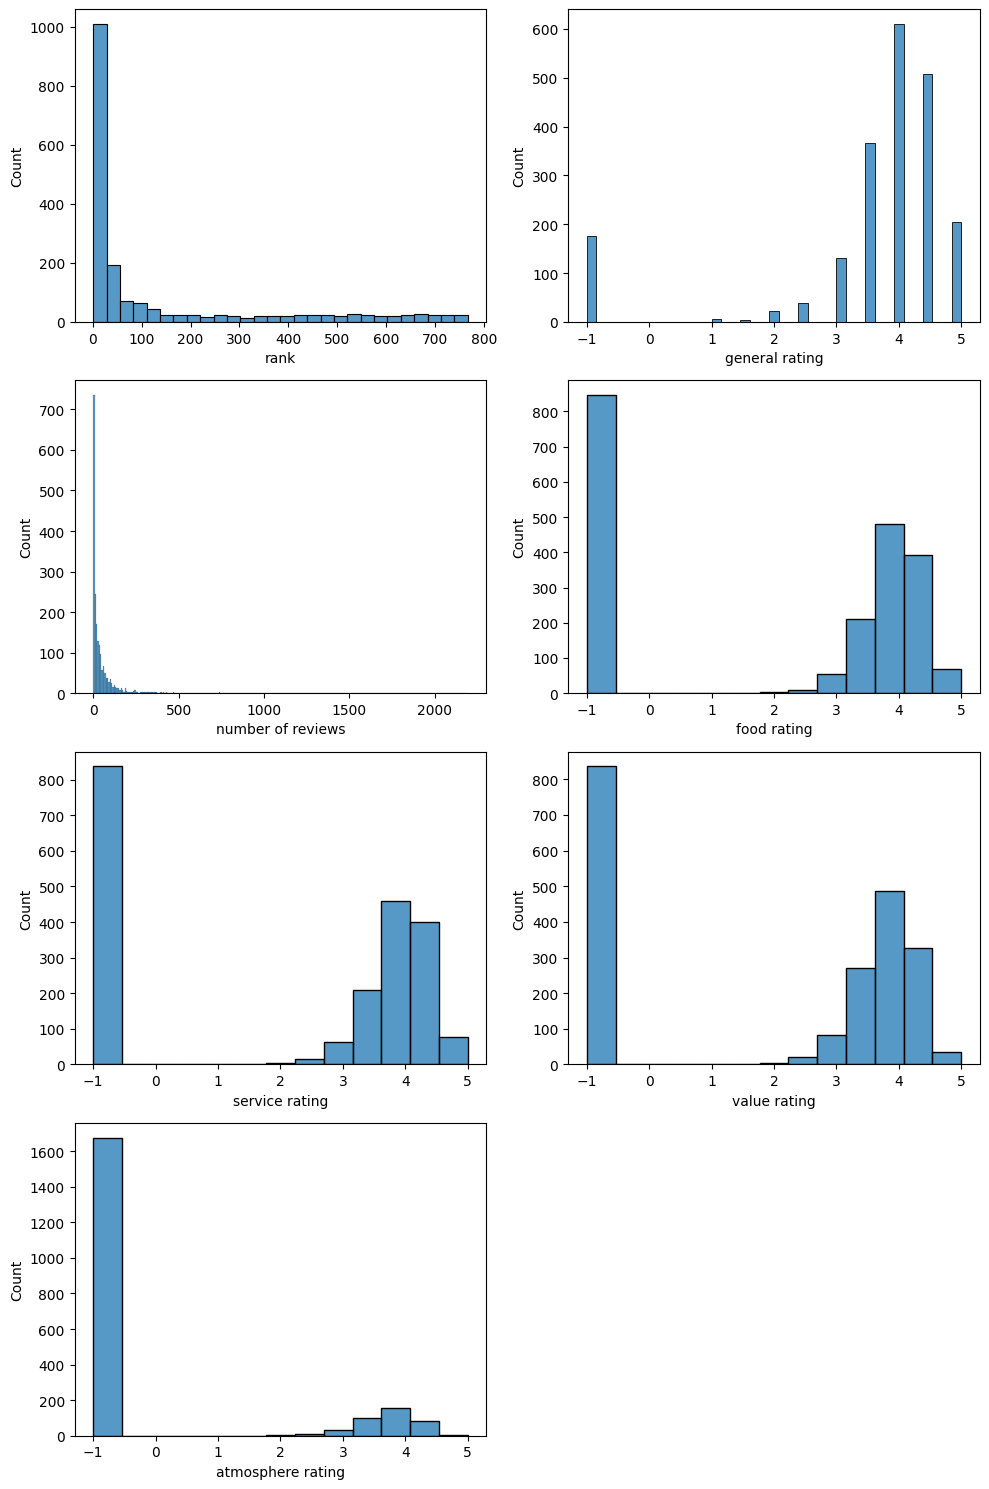

In [7]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

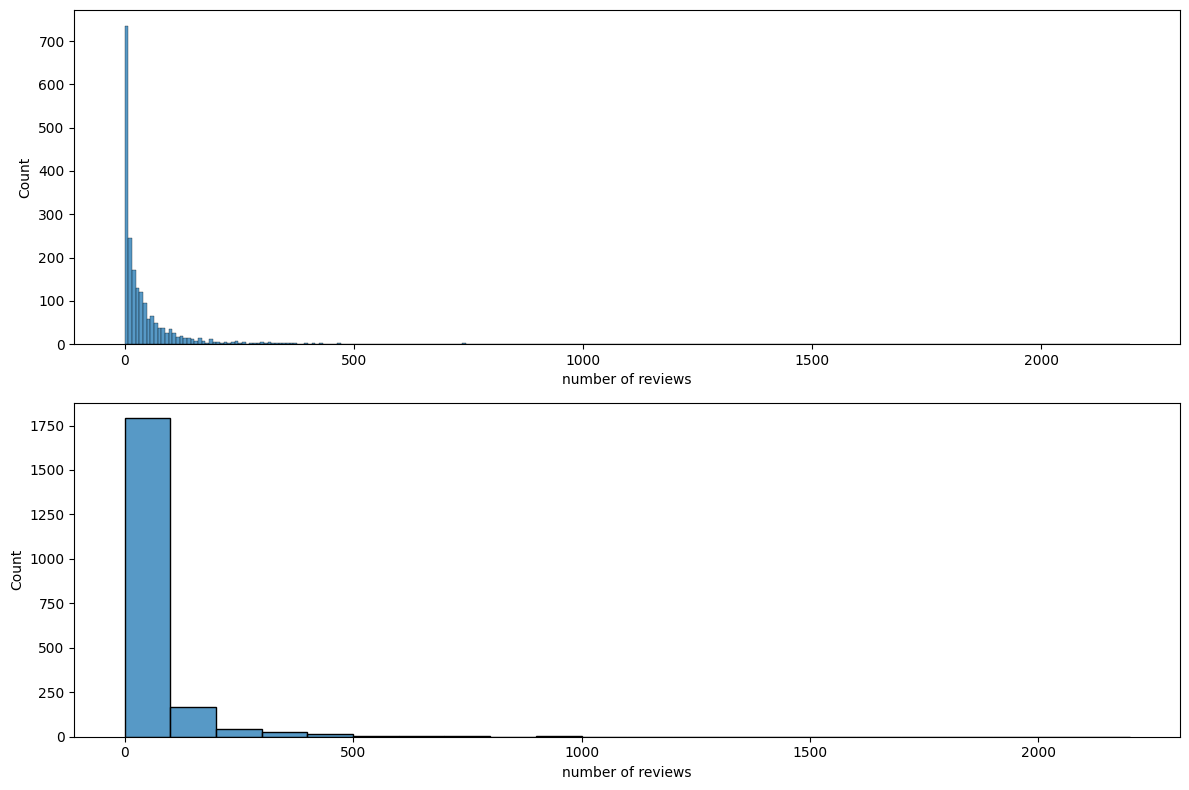

In [8]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [9]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      175
1.0      112
2.0      103
3.0       77
4.0       70
        ... 
155.0      1
181.0      1
227.0      1
260.0      1
261.0      1
Name: number of reviews, Length: 269, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [10]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.48% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [11]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 22.63%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe because of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [12]:
df_train['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]

we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [13]:
import requests
import urllib.parse
def getCoordinates(address):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    # print(response)
    if(len(response)>0):
        return response[0]["lat"],response[0]["lon"]
    else:
        return np.NaN,np.NaN;

In [14]:
# coords=df_train.apply(lambda row : getCoordinates(row["address"]),axis=1)
# we cancelled this idea beacuse it takes too long to fetch the coordinates for each address ಥ_ಥ

In [15]:
df_train.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id,city
1862,8.0,Frituur Peter,3.5,11.0,$$ - $$$|Belgian|Bar|European,"Diederikstraat 42, Assenede 9960 Belgium",+32 9 344 27 00,NaN,NaN,False,NaN,False,False,4.0,3.5,4.0,-1.0,NaN,NaN,No pricing available,"Bar, Pub, Belgian, European",NaN,NaN,NaN,12152537,Assenede
84,1.0,The Boondocks - American Steakhouse,4.0,215.0,$$ - $$$|American|Steakhouse|Grill,"Watermolenweg 102, Wichelen 9260 Belgium",+32 9 366 62 33,http://www.boondocks.be/,http://www.boondocks.be/menu.asp?id=1&lang=,True,NaN,False,False,4.5,4.0,4.0,4.0,NaN,NaN,€15 - €30,"American, Steakhouse, Grill",NaN,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Parkin...",3368355,Wichelen


now we can also look at the price range

In [16]:
df_train["price range"]

1862    No pricing available
84                 €15 - €30
364               €25 - €150
387     No pricing available
2230               €15 - €36
                ...         
2464    No pricing available
1220    No pricing available
1947               €20 - €25
727                 €4 - €24
1945    No pricing available
Name: price range, Length: 2064, dtype: object

we can split this up into upper_price and lowr_price if it's available

In [17]:
temp=df_train["price range"].str.replace("No pricing available","nan - nan").str.replace("€","").str.split("-",expand=True).rename(columns={0:"lower price",1:"upper price"})
df_train["lower_price"]=temp["lower price"].astype(float)
df_train["upper_price"]=temp["upper price"].astype(float)


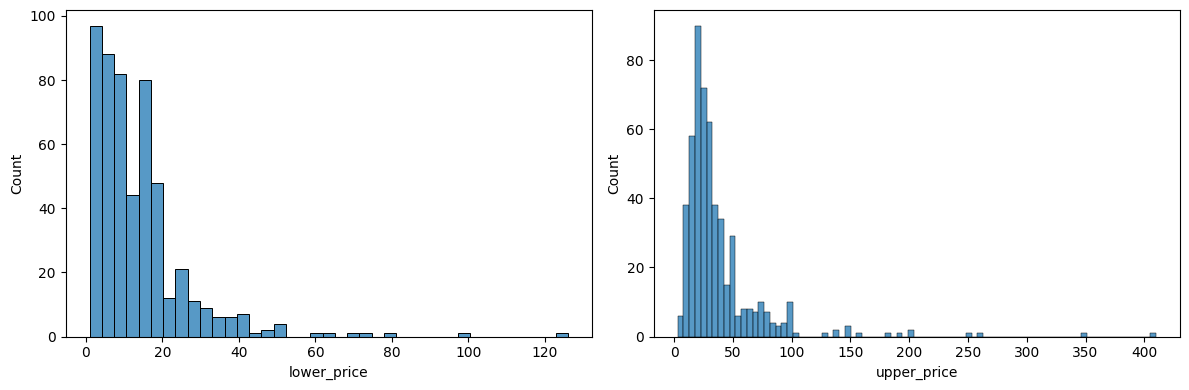

In [18]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_train["lower_price"])
plt.subplot(1,2,2)
sns.histplot(df_train["upper_price"])
fig.tight_layout()
plt.show()


as we can see there are restaureants who have minimum prices of €100 and upper prices of more than €400, lets check if that's not a typo

In [19]:
high_upper=df_train[df_train["upper_price"]>150]
high_upper[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

,restaurant name,rank,general rating,number of reviews,michelin,food rating,service rating,value rating,atmosphere rating,lower_price,upper_price,meals
982,Asian King,389.0,4.0,33.0,False,4.0,4.0,4.0,-1.0,4.0,180.0,"Lunch, Dinner"
1344,iGent,496.0,4.5,18.0,False,1.0,1.5,1.5,1.0,1.0,200.0,"Lunch, Dinner"
272,Amatsu,141.0,4.0,149.0,True,4.5,4.5,4.0,4.0,39.0,157.0,"Dinner, Late Night"
22,Portobelfino,2.0,4.5,400.0,False,4.5,4.5,4.5,4.5,100.0,250.0,"Lunch, Dinner, Late Night"
14,Hof van Cleve,1.0,5.0,472.0,True,5.0,5.0,4.5,4.5,126.0,260.0,"Lunch, Dinner, Late Night"
1268,K27,478.0,4.5,11.0,False,-1.0,-1.0,-1.0,-1.0,2.0,349.0,Drinks
533,Ter schroeven,5.0,4.5,61.0,False,4.5,4.5,4.5,4.5,71.0,190.0,"Lunch, Dinner, Late Night"
30,Gillis,19.0,4.5,428.0,False,4.5,4.5,4.0,4.5,60.0,200.0,Dinner
2195,Divan Palace,713.0,3.0,9.0,False,3.5,3.5,4.0,-1.0,2.0,410.0,"Breakfast, Lunch, Dinner"


from the restaurants who have high upper prices:
* there is 1 with a michelin star
* on average they have a general rating >=4
* the lower price is exteremely low! maybe because they include drinks in their lower price
* we conclude that rank propably means popularity. the restaurant Amatsu has a michelin star, which means the food, service,... is excellent but it's rank is only 272. Average people don't go to michelin starred restaurant very often so that is maybe the cause of the lower rank.
* the data is a little messed up. iGent has an upper price of €200. as students of Ghent University we can testify that that is incorrect

In [20]:
high_lower=df_train[df_train["lower_price"]>=40]
high_lower=high_lower[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

In [21]:
print(f"number of retaurants with a michelin star: {high_lower.michelin.sum()}")
high_lower

number of retaurants with a michelin star: 7


,restaurant name,rank,general rating,number of reviews,michelin,food rating,service rating,value rating,atmosphere rating,lower_price,upper_price,meals
281,Herbert Robbrecht,2.0,4.5,103.0,False,4.5,4.0,4.0,4.0,48.0,68.0,"Lunch, Dinner"
3,Roots,3.0,5.0,282.0,True,5.0,4.5,5.0,-1.0,40.0,80.0,"Lunch, Dinner"
172,Somm,94.0,5.0,37.0,False,5.0,5.0,5.0,-1.0,50.0,85.0,"Dinner, Drinks"
179,Rizoom,100.0,5.0,35.0,True,5.0,4.5,4.5,-1.0,50.0,100.0,"Dinner, Lunch"
433,John Dory,205.0,5.0,20.0,False,5.0,5.0,5.0,-1.0,48.0,70.0,"Dinner, Lunch"
421,Les Abris,4.0,4.5,38.0,True,4.5,4.5,4.0,-1.0,52.0,64.0,"Dinner, Lunch"
278,De Gouden Klok,144.0,4.5,59.0,False,4.5,4.5,4.0,4.5,74.0,147.0,"Lunch, Dinner"
22,Portobelfino,2.0,4.5,400.0,False,4.5,4.5,4.5,4.5,100.0,250.0,"Lunch, Dinner, Late Night"
341,Dolce far Niente,8.0,4.5,64.0,False,4.5,4.5,4.5,4.5,40.0,75.0,"Lunch, Dinner, Drinks"
119,De Pastorie,1.0,4.5,106.0,False,4.5,4.5,4.5,4.5,79.0,89.0,"Lunch, Dinner"


here we don't see extreme price ranges like with the restaurants with high upper ratings. Only 5(changees due too shuffling when testdata is split) restaurants have a michelin star and most of them have a decent general rating

also interesting to note is that in this subgroup, the ranks are much higher. so if I want my restaurant to have a high rank, it is better to not have extreme high upper prices so my restaurant is more appealing to the general public

### cheap_restaurants

In [22]:
cheap_restaurants=df_train[df_train["upper_price"]<=30]
cheap_restaurants=cheap_restaurants[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


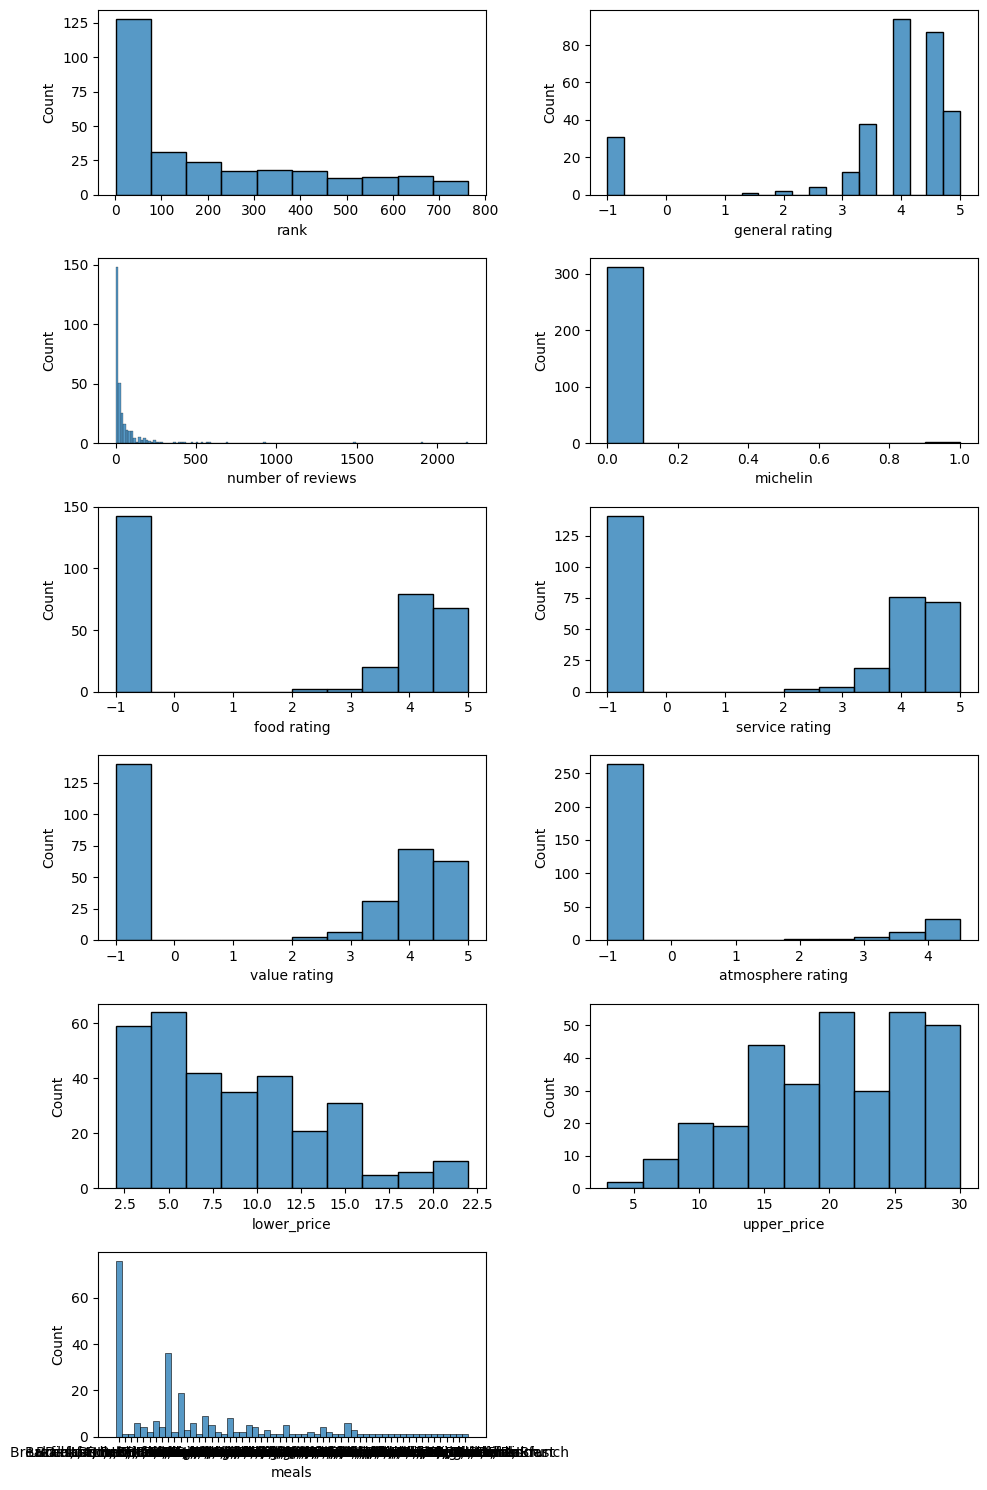

In [23]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(["rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]):
    plt.subplot(6,2,i+1)
    sns.histplot(cheap_restaurants[col])
fig.tight_layout()
plt.show()

* we can see that a lot of cheap restaurants have a high rank, this confirms our hypothesis that rank is a proxy for popularity!
* we can see a very clear peak in the meals chart, lets take a closer look


In [25]:
cheap_restaurants.meals.value_counts()
meals=cheap_restaurants.meals.str.split(",",expand=True)
pd.concat((meals[0],meals[1],meals[2],meals[3],meals[4])).str.strip().value_counts()

Lunch         217
Dinner        214
Drinks        109
Breakfast      51
Brunch         46
Late Night     20
dtype: int64

From all the cheap restaurants, most types of meals offered is Lunch, which is expected. 
But it's also interesting to note most of the cheap restaurants also serve Dinner and Drinks.


A lot of the ratings are -1, lets look at the cheap restaurants without these contaminations

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



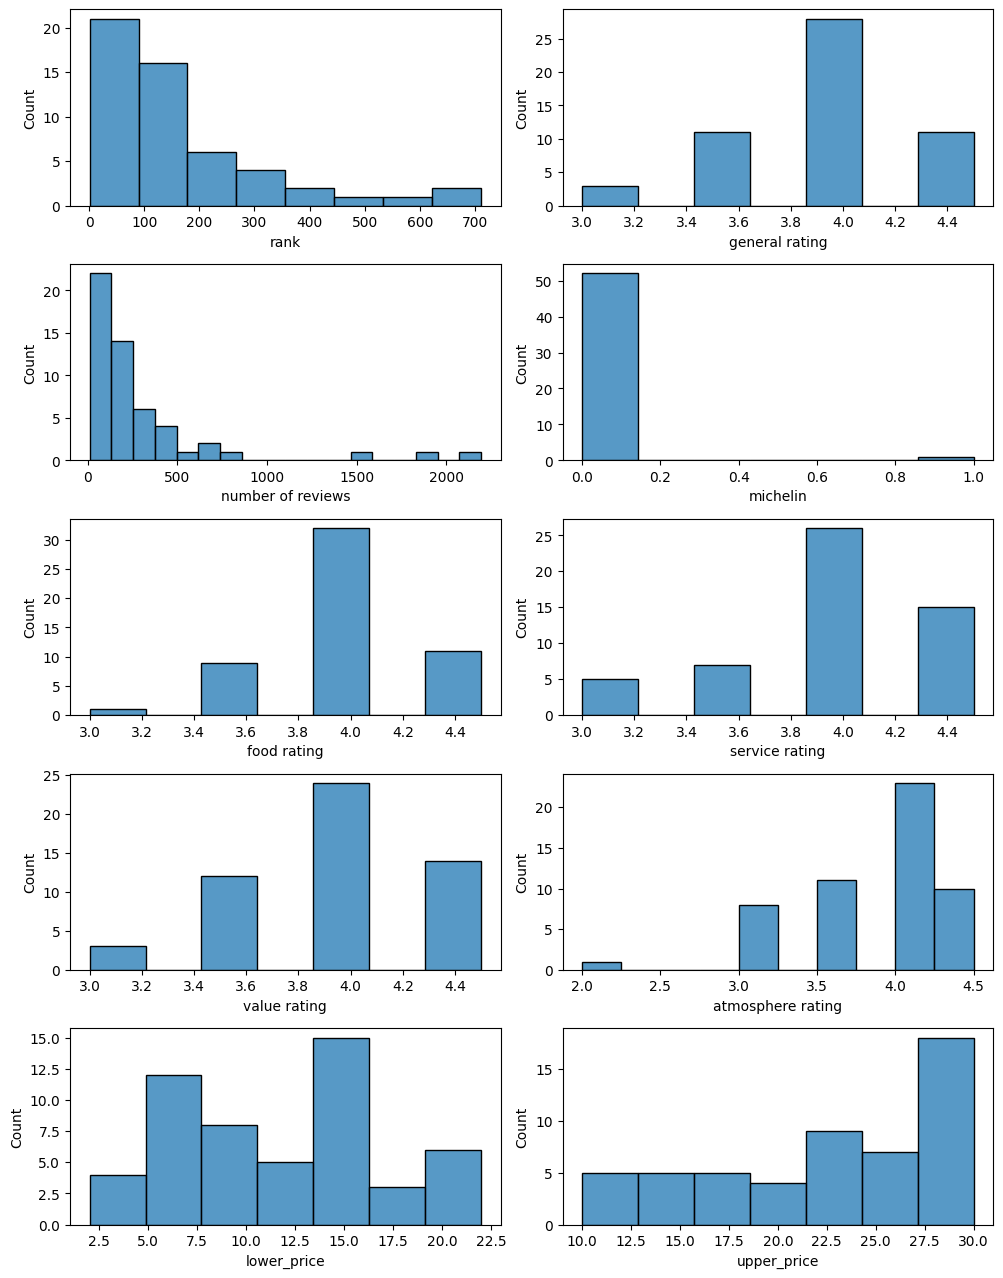

In [150]:
cheap_restaurants_with_rating=cheap_restaurants.replace(-1,np.nan).dropna()
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(["rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price"]):
    plt.subplot(6,2,i+1)
    sns.histplot(cheap_restaurants_with_rating[col])
fig.tight_layout()
plt.show()

* general-, food-,service- and value rating have the same distribution. from this we suspect that these values have high correlations. If one of my ratings is good, the others are very close to it. we could then drop the reduntant features.


we will take a closer look at thiss later in the notebook

### Hidden treasures
lets look at these hidden treasures in more detail (remember, hidden treasures are restaurants that have less than 4 ratings)

In [27]:
hidden_treasures=df_train[df_train["number of reviews"]<=3]
hidden_treasures.replace(-1,np.nan).isna().sum()

rank                   177
restaurant name          0
general rating         175
number of reviews        0
tags                   123
address                  0
phone number            79
website url            146
menu url               420
timetable                0
email address          256
travelers choice         0
michelin                 0
food rating            467
service rating         467
value rating           467
atmosphere rating      467
description            354
dutch description      411
price range              0
cuisines               132
special diets          466
meals                  258
restaurant features    418
id                       0
city                     0
lower_price            375
upper_price            375
dtype: int64

In [28]:
len(hidden_treasures)

467

we can see that all of the hidden treasures have no rating!

let's plot some graphs to see if we can get some insights

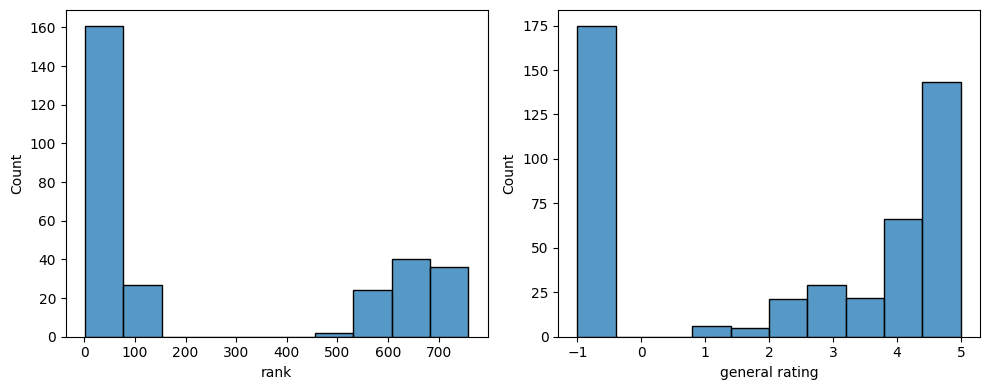

In [34]:
cheap_restaurants_with_rating=cheap_restaurants.replace(-1,np.nan).dropna()
fig=plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(hidden_treasures["rank"])
plt.subplot(1,2,2)
sns.histplot(hidden_treasures["general rating"])
fig.tight_layout()
plt.show()

very interesting to see that there is a clear seperation! we have hidden treasures with ranks < 200 and with ranks >400. but no in between


maybe we can find out why by looking at their ratings

In [37]:
hidden_treasures_low_rank=hidden_treasures[hidden_treasures["rank"]<200]
hidden_treasures_high_rank=hidden_treasures[hidden_treasures["rank"]>400]
print(f"low: {len(hidden_treasures_low_rank)} high: {len(hidden_treasures_high_rank)}")

low: 188 high: 102


<AxesSubplot: xlabel='general rating', ylabel='Count'>

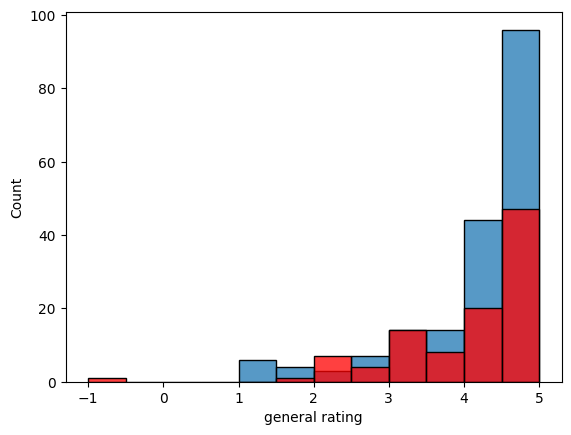

In [61]:
# hidden_treasures_low_rank["general rating"].value_counts().plot.bar()
# hidden_treasures_high_rank["general rating"].value_counts().plot.bar()
sns.histplot(binwidth=0.5,
            x="general rating",
            data=hidden_treasures_low_rank,
            stat="count",legend=True)
sns.histplot(binwidth=0.5,
            x="general rating",
            data=hidden_treasures_high_rank,
            color="red",
            stat="count",legend=True)

In [64]:
print(hidden_treasures_low_rank["general rating"].describe())
hidden_treasures_high_rank["general rating"].describe()


count    188.000000
mean       4.063830
std        1.012579
min        1.000000
25%        3.500000
50%        4.500000
75%        5.000000
max        5.000000
Name: general rating, dtype: float64


count    102.000000
mean       3.950980
std        1.095693
min       -1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: general rating, dtype: float64

on average there is not much difference in general rating between the high ranking and the low ranking hidden treasures 

let's try to plot them on the map to see why they might have so few reviews

In [70]:
coords=pd.read_csv("coordinaten2.csv")
hidden_treasures_low_rank=hidden_treasures_low_rank.merge(coords,on="id")
hidden_treasures_high_rank=hidden_treasures_high_rank.merge(coords,on="id")

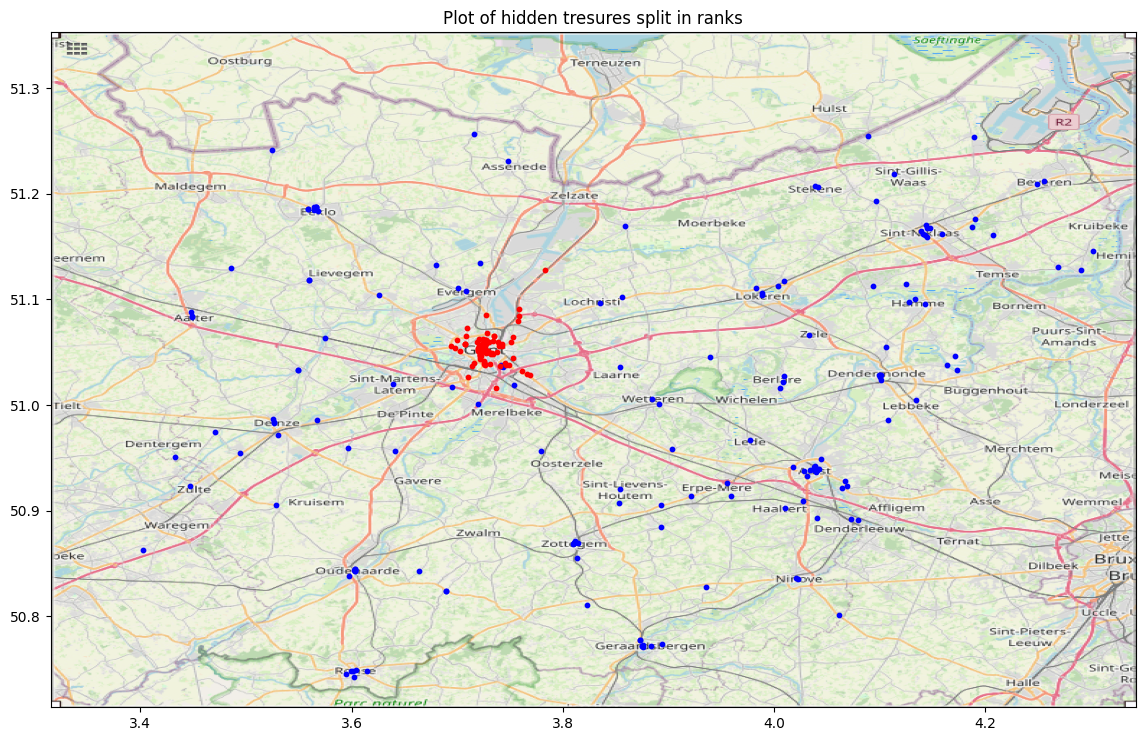

In [72]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(hidden_treasures_low_rank.longitude, hidden_treasures_low_rank.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(hidden_treasures_high_rank.longitude, hidden_treasures_high_rank.latitude, zorder=1, alpha= 1, c='r',s=10)

ax.set_title('Plot of hidden tresures split in ranks')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

# WOELOELOELEOLEOLEOLEOELOE



in a seperate notebook i added coordinates hier nog mooie tekst schrijven

In [92]:
coord=pd.read_csv("coordinates.csv")

In [97]:
coord

,id,coord
0,13969825,"('51.0548994', '3.7223248')"
1,740727,"('50.7887051', '4.052819574178704')"
2,12188645,"(nan, nan)"
3,9710340,"('51.0582196', '3.7222621')"
4,8298124,"('51.0268308', '4.1005587')"
...,...,...
2576,18220557,"('50.8528124', '3.7866609')"
2577,23571474,"('50.9032568', '3.5050821')"
2578,3956680,"('50.947908850000005', '4.097626326789348')"
2579,23363568,"('50.9478251', '4.098753863305806')"


In [70]:
df_train.groupby(["city"])["general rating"]

city
Aaigem        4.000000
Aalst         3.512295
Aalter        3.761905
Adegem        4.083333
Afsnee        3.000000
                ...   
Zomergem      4.200000
Zottegem      3.564103
Zulte         4.428571
Zwalm         3.357143
Zwijnaarde    4.500000
Name: general rating, Length: 157, dtype: float64

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer